<a href="https://colab.research.google.com/github/Aditi0102/ML-notebook/blob/main/CovNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
%tensorflow_version 2.x

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import clear_output
import cv2
from google.colab.patches import cv2_imshow
import math

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aditiagarwal01","key":"4c56849565c39183e765f285aeafe7d3"}\n'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mohamedmustafa/real-life-violence-situations-dataset

100% 3.57G/3.58G [01:38<00:00, 25.0MB/s]
100% 3.58G/3.58G [01:39<00:00, 38.9MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip
clear_output()
print("Extracted")

Extracted


In [6]:
import os
train_folder = 'v/'
if not os.path.exists(train_folder):
    os.makedirs(train_folder)

In [7]:
# Training Data
count = 0
for i in range (1,200):
    videoFile = f"/content/real life violence situations/Real Life Violence Dataset/Violence/V_{i}.mp4"
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    print(f"Processing Violence_{i}")
    while True:
        ret, frame = cap.read()
        if ret is False:
            break
        frame = cv2.resize(frame, (64,64))
        fname = '%s/%d.jpg' % (train_folder, count)
        cv2.imwrite(fname, frame)
        count += 1
    
    cap.release()
clear_output()
print("Done Training with Violence !!")
print(len(img_set))

Done Training with Violence !!
18076


In [8]:
import os
test_folder = 'v_test/'
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

In [9]:
# Testing Data
count = 0
for i in range (200,300):
    videoFile = f"/content/real life violence situations/Real Life Violence Dataset/Violence/V_{i}.mp4"
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    print(f"Processing Violence_{i}")
    while True:
        ret, frame = cap.read()
        if ret is False:
            break
        frame = cv2.resize(frame, (64,64))
        fname = '%s/%d.jpg' % (test_folder, count)
        cv2.imwrite(fname, frame)
        count += 1
    
    cap.release()
clear_output()
print("Done Training with Violence !!")
print(len(img_set))

Done Training with Violence !!
18076


In [10]:
import os
nv_folder = 'nv/'
if not os.path.exists(nv_folder):
    os.makedirs(nv_folder)

In [11]:
count = 0
for i in range (1,200):
    videoFile = f"/content/real life violence situations/Real Life Violence Dataset/NonViolence/NV_{i}.mp4"
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    print(f"Reading File NonViolence_{i}")
    while True:
        ret, frame = cap.read()
        if ret is False:
            break

        frame = cv2.resize(frame, (64,64))
        fname = '%s/%d.jpg' % (nv_folder, count)
        cv2.imwrite(fname, frame)
        count += 1

        count += 1
    cap.release()
clear_output()
print("Done Training with Non-Violence !!")

Done Training with Non-Violence !!


In [12]:
import os
nv_test_folder = 'nv_test/'
if not os.path.exists(nv_test_folder):
    os.makedirs(nv_test_folder)

In [13]:
count = 0
for i in range (200,300):
    videoFile = f"/content/real life violence situations/Real Life Violence Dataset/NonViolence/NV_{i}.mp4"
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    print(f"Reading File NonViolence_{i}")
    while True:
        ret, frame = cap.read()
        if ret is False:
            break

        frame = cv2.resize(frame, (64,64))
        fname = '%s/%d.jpg' % (nv_test_folder, count)
        cv2.imwrite(fname, frame)
        count += 1

        count += 1
    cap.release()
clear_output()
print("Done Training with Non-Violence !!")

Done Training with Non-Violence !!


In [50]:
img_set = np.array(img_set)
labels = np.array(labels)
class_names=["Violence", "Non-Violence"]
print(img_set.shape, labels.shape)

(26726, 64, 64, 3) (26726,)


In [ ]:
train_images, train_labels = img_set / 255.0, labels

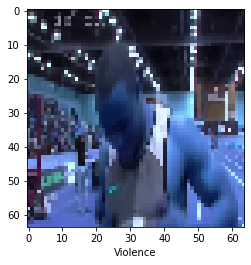

In [49]:
IMG_INDEX = 0  # change this to look at other images
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX]])
plt.show()

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4, 256)       

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
836/836 [==============================] - 7s 7ms/step - loss: 0.0230 - accuracy: 0.9913
Epoch 2/5
406/836 [=============>................] - ETA: 2s - loss: 6.2503e-09 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
import time
t = time.time()
export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1610975527.h5


In [ ]:
!ls

 1610952410.h5	'Real Life Violence Dataset'	  sample_data
 kaggle.json	'real life violence situations'


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

41/41 - 2s - loss: 0.6931 - accuracy: 0.5004
0.5003896951675415
